In [36]:
from plotting import *
from CVZ import *
%matplotlib inline
# get simulation
self = loadpickle('pickles/RVInformationGP_Nrvge10')
#self = loadpickle('pickles/RVInformationGP')

In [57]:
# write function that returns indices of planets of interest based on their median observing times 
def get_planets(tobs, g, N=0, sort=True):
    tobsinds = np.argsort(tobs[g]) if sort else np.arange(tobs[g].size)
    inds = np.arange(tobs.size)[g][tobsinds]
    return inds if N == 0 else inds[:int(N)]

## Measuring the 3$\sigma$ mass of one temperate Earth-sized planet

In [58]:
ind = 1451
print 'Orbital period = %.3f days'%self.Ps_med[ind]
print 'Planet radius = %.3f Earth radii'%self.rps_med[ind]
print 'Planet mass = %.3f Earth masses'%self.mps_med[ind]
print 'J = %.3f'%self.Jmags_med[ind]
print 'Stellar effective temperature = %i K'%self.Teffs_med[ind]

Orbital period = 26.300 days
Planet radius = 1.292 Earth radii
Planet mass = 2.660 Earth masses
J = 10.270
Stellar effective temperature = 3284 K


In [59]:
print 'Exposure time = %.2f minutes'%self.texps_med_N[ind]
print 'RV precision = %.2f m/s'%self.sigmaRV_phot_med_N[ind]
print 'Median effective RV rms = %.2f m/s'%self.sigmaRV_eff_med_N[ind]
print 'Median number of RV measurements required = %.1f'%self.NrvGPs_med_N[ind]
print 'Total observing time = %.1f hours (i.e. %.1f nights)'%(self.tobsGPs_med_N[ind], self.tobsGPs_med_N[ind]/7.)
tobs_WP2 = self.tobsGPs_med_N[ind]

Exposure time = 10.00 minutes
RV precision = 2.98 m/s
Median effective RV rms = 7.86 m/s
Median number of RV measurements required = 248.8
Total observing time = 41.5 hours (i.e. 5.9 nights)


## Measuring the 3$\sigma$ mass of the 30 'best' planets around the Fulton gap

((0, 57.142857142857146), <matplotlib.text.Text at 0x1a39b39a90>)

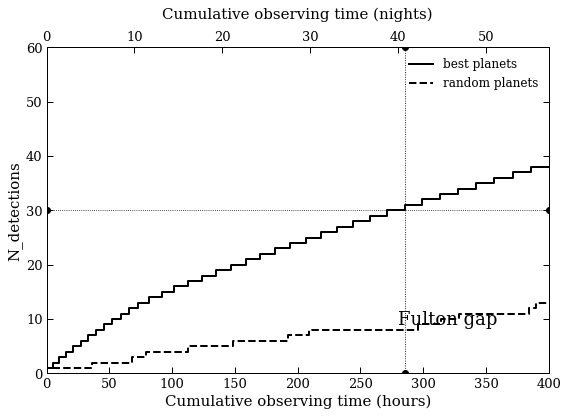

In [60]:
N = 30
scale = (.327/.189)**2  # 3 -> 5 sigma
g = (self.rps_med >= 1.5) & (self.rps_med <= 2)
tobs = np.append(0, np.cumsum(np.sort(self.tobsGPs_med_N[g]*scale)))
tobs2 = np.append(0, np.cumsum(self.tobsGPs_med_N[g]*scale))
Ndet= np.arange(tobs.size)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax1.plot(tobs, Ndet, 'k-', lw=2, drawstyle='steps', label='best planets')
ax1.plot(tobs2, Ndet, 'k--', lw=2, drawstyle='steps', label='random planets')
ax1.axhline(N, ls=':', lw=.8), ax1.axvline(tobs[Ndet==N], ls=':', lw=.9)
tobs_WP2 = np.append(tobs_WP2, tobs[Ndet==N])
ax1.set_xlim((0,4e2)), ax1.set_ylim((0,60)), ax1.legend(loc='upper right', fontsize=12)
ax1.set_xlabel('Cumulative observing time (hours)'), ax1.set_ylabel('N_detections')
ax1.text(.7, .15, 'Fulton gap', transform=ax1.transAxes, fontsize=18)
ax2 = ax1.twiny()
ax2.set_xlim((0,4e2/7)), ax2.set_xlabel('Cumulative observing time (nights)', labelpad=12)

In [65]:
# save TOI indices
inds = get_planets(self.tobsGPs_med_N, g, N)

## Extending the MR relation with 10 planets with $r_p \in [2,4] R_{\oplus}$

((0, 28.571428571428573), <matplotlib.text.Text at 0x1a3b199f90>)

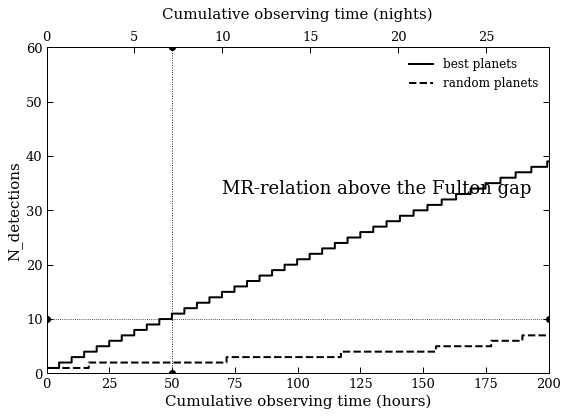

In [66]:
N = 10 
g = (self.rps_med > 2) & (self.rps_med <= 4)
tobs = np.append(0, np.cumsum(np.sort(self.tobsGPs_med_N[g]*scale)))
tobs2 = np.append(0, np.cumsum(self.tobsGPs_med_N[g]*scale))
Ndet= np.arange(tobs.size)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax1.plot(tobs, Ndet, 'k-', lw=2, drawstyle='steps', label='best planets')
ax1.plot(tobs2, Ndet, 'k--', lw=2, drawstyle='steps', label='random planets')
ax1.axhline(N, ls=':', lw=.8), ax1.axvline(tobs[Ndet==N], ls=':', lw=.9)
tobs_WP2 = np.append(tobs_WP2, tobs[Ndet==N])
ax1.set_xlim((0,2e2)), ax1.set_ylim((0,60)), ax1.legend(loc='upper right', fontsize=12)
ax1.set_xlabel('Cumulative observing time (hours)'), ax1.set_ylabel('N_detections')
ax1.text(.35, .55, 'MR-relation above the Fulton gap', transform=ax1.transAxes, fontsize=18)
ax2 = ax1.twiny()
ax2.set_xlim((0,2e2/7)), ax2.set_xlabel('Cumulative observing time (nights)', labelpad=12)

In [68]:
inds = np.append(inds, get_planets(self.tobsGPs_med_N, g, N))

## Extending the MR relation with 10 more planets with $r_p \leq 1.5 R_{\oplus}$

((0, 28.571428571428573), <matplotlib.text.Text at 0x1a260ea690>)

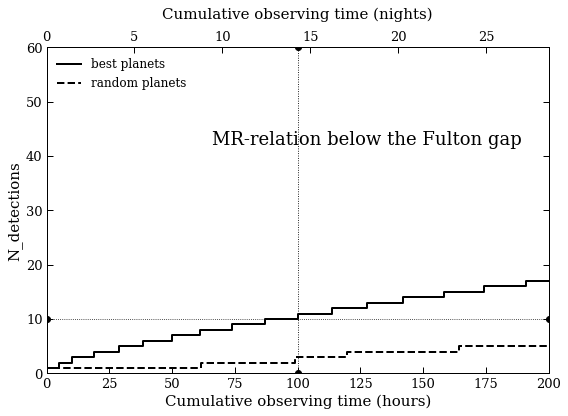

In [29]:
N=10
g = (self.rps_med <= 1.5)
tobs = np.append(0, np.cumsum(np.sort(self.tobsGPs_med_N[g]*scale)))
tobs2 = np.append(0, np.cumsum(self.tobsGPs_med_N[g]*scale))
Ndet= np.arange(tobs.size)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax1.plot(tobs, Ndet, 'k-', lw=2, drawstyle='steps', label='best planets')
ax1.plot(tobs2, Ndet, 'k--', lw=2, drawstyle='steps', label='random planets')
ax1.axhline(N, ls=':', lw=.8), ax1.axvline(tobs[Ndet==N], ls=':', lw=.9)
tobs_WP2 = np.append(tobs_WP2, tobs[Ndet==N])
ax1.set_xlim((0,2e2)), ax1.set_ylim((0,60)), ax1.legend(loc='upper left', fontsize=12)
ax1.set_xlabel('Cumulative observing time (hours)'), ax1.set_ylabel('N_detections')
ax1.text(.33, .7, 'MR-relation below the Fulton gap', transform=ax1.transAxes, fontsize=18)
ax2 = ax1.twiny()
ax2.set_xlim((0,2e2/7)), ax2.set_xlabel('Cumulative observing time (nights)', labelpad=12)

In [35]:
inds = np.append(inds, get_planets(self.tobsGPs_med_N, g, N))

array([  4.961,   7.623,   6.311,   9.691,   8.41 ,  12.38 ,  11.71 ,
        10.72 ,  10.32 ,   7.238])

## Measuring the 3$\sigma$ mass of TRAPPIST-1b

From separate calculations assuming an RV activity rms equal to the photon-noise limited RV precision of TRAPPIST-1 with SPIRou (4.51 m/s)

In [31]:
print 'Exposure time = 10.00 minutes'
print 'RV precision = 4.51 m/s'
print 'Number of RV measurements required = 234.1'
print 'Total observing time = 39.0 hours (i.e. 5.6 nights)'
#tobs_WP2 = np.append(tobs_WP2, 39.017)

Exposure time = 10.00 minutes
RV precision = 4.51 m/s
Number of RV measurements required = 234.1
Total observing time = 39.0 hours (i.e. 5.6 nights)


In [34]:
tobs_WP2, tobs_WP2.sum()/7

(array([  41.45833333,  285.17360521,   49.89082053,  100.21995187]),
 68.106101562586218)

## Measuring the masses of (random) potential JWST targets with $J<10$

((0, 57.142857142857146), <matplotlib.text.Text at 0x1a15a0e750>)

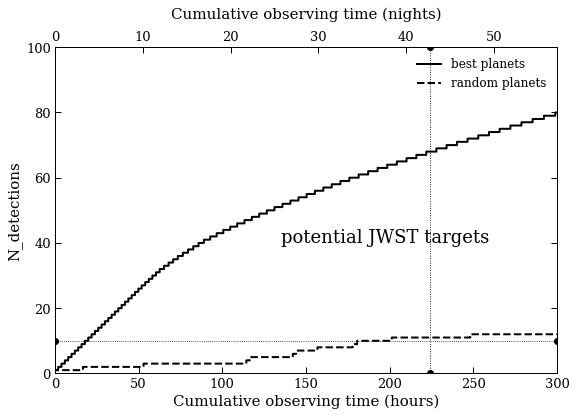

In [269]:
g = (self.Jmags_med >= 6.1) & (self.Jmags_med < 10)
tobs = np.append(0, np.cumsum(np.sort(self.tobsGPs_med_N[g]*scale)))
tobs2 = np.append(0, np.cumsum(self.tobsGPs_med_N[g]*scale))
Ndet= np.arange(tobs.size)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax1.plot(tobs, Ndet, 'k-', lw=2, drawstyle='steps', label='best planets')
ax1.plot(tobs2, Ndet, 'k--', lw=2, drawstyle='steps', label='random planets')
tobs_remaining = 95*7 - tobs_WP2.sum()
Njwst = int(Ndet[abs(tobs2-tobs_remaining)==np.min(abs(tobs2-tobs_remaining))])
tobs_WP2 = np.append(tobs_WP2, tobs_remaining)
ax1.axhline(Njwst, ls=':', lw=.8), ax1.axvline(tobs_remaining, ls=':', lw=.9)
ax1.set_xlim((0,np.ceil(tobs_remaining/1e2)*1e2)), ax1.set_ylim((0,1e2)), ax1.legend(loc='upper right', fontsize=12)
ax1.set_xlabel('Cumulative observing time (hours)'), ax1.set_ylabel('N_detections')
ax1.text(.45, .4, 'potential JWST targets', transform=ax1.transAxes, fontsize=18)
ax2 = ax1.twiny()
ax2.set_xlim((0,4e2/7)), ax2.set_xlabel('Cumulative observing time (nights)', labelpad=12)

In [270]:
print 'We detect %i random potential JWST targets in %.1f hours (i.e. %.1f nights)'%(Njwst, tobs_remaining, tobs_remaining/7)

We detect 10 random potential JWST targets in 223.8 hours (i.e. 32.0 nights)


Plot histogram of the detected potential JWST targets:

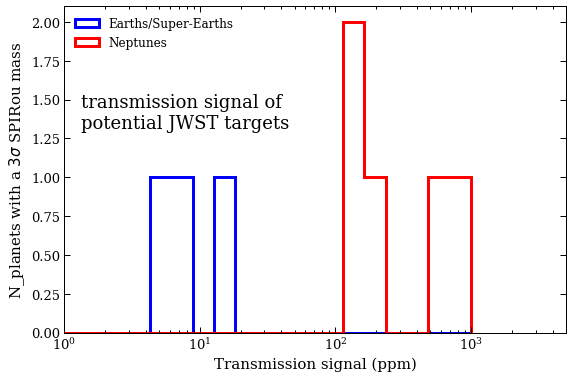

In [271]:
# get transmission signals
Teffs, Rss, Ps, Mss, mps, rps = self.Teffs_med[g][:Njwst], self.Rss_med[g][:Njwst], self.Ps_med[g][:Njwst], self.Mss_med[g][:Njwst], self.mps_med[g][:Njwst], self.rps_med[g][:Njwst]
Tps = Teffs * np.sqrt(rvs.Rsun2m(Rss)/(2*rvs.AU2m(rvs.semimajoraxis(Ps,Mss,mps))))
mus = np.repeat(2, Tps.size)
mus[rps <= 2] = 18.
transmission_ppm = rvs.transmission_spectroscopy_depth(Rss, mps, rps, Tps, mus)
plt.figure(figsize=(9,6))
g1 = rps <= 2
plt.hist(transmission_ppm[g1], bins=np.logspace(0,3,20), histtype='step', color='b', lw=3, label='Earths/Super-Earths')
g2 = rps > 2
plt.hist(transmission_ppm[g2], bins=np.logspace(0,3,20), histtype='step', color='r', lw=3, label='Neptunes')
plt.xscale('log'), plt.xlim((0,5e3)), plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Transmission signal (ppm)'), plt.ylabel('N_planets with a $3\sigma$ SPIRou mass')
plt.text(0, .6, 'transmission signal of\npotential JWST targets', transform=ax1.transAxes, fontsize=18)

In [272]:
labels = ['1 temperature Earth-sized planet','30 planets at the Fulton gap','10 planets above the Fulton gap','10 planets below the Fulton gap','TRAPPIST-1b','%i JWST follow-up targets'%Njwst]
for i in range(tobs_WP2.size):
    print 'Measuring %s requires %.1f hours (i.e. %.1f nights).'%(labels[i], tobs_WP2[i], tobs_WP2[i]/7)
print 'Total observing time = %.1f hours (i.e. %.1f nights)'%(tobs_WP2.sum(), tobs_WP2.sum()/7.)

Measuring 1 temperature Earth-sized planet requires 41.5 hours (i.e. 5.9 nights).
Measuring 30 planets at the Fulton gap requires 276.3 hours (i.e. 39.5 nights).
Measuring 10 planets above the Fulton gap requires 22.7 hours (i.e. 3.2 nights).
Measuring 10 planets below the Fulton gap requires 96.7 hours (i.e. 13.8 nights).
Measuring TRAPPIST-1b requires 39.0 hours (i.e. 5.6 nights).
Measuring 10 JWST follow-up targets requires 223.8 hours (i.e. 32.0 nights).
Total observing time = 700.0 hours (i.e. 100.0 nights)


In [273]:
inds = get_planets(self.tobsGPs_med_N, g, Njwst, sort=False)
print self.tobsGPs_med_N[inds].sum()*scale

201.259570001


([<matplotlib.lines.Line2D at 0x1a3caad050>], None)

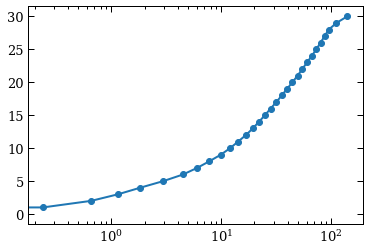

In [56]:
g = is_star_in_CVZ(self.ras_med, self.decs_med)
inds = get_planets(self.tobsGPs_med_N, g.astype(bool))
#plt.hist(self.tobsGPs_med_N[inds], bins=np.logspace(1,3,10)), plt.xscale('log')
plt.plot(np.append(0, np.cumsum(self.tobsGPs_med_N[inds]))/7, np.arange(inds.size+1)), plt.xscale('log')

In [50]:
inds

array([ 492, 1479, 1467, 1525, 1519, 1506,  535, 1466, 1529, 1490, 1515,
        521,  514,  506,  534, 1476, 1496, 1520,  482, 1474, 1509,  512,
       1495, 1470,  489,  565,  480, 1468,  508, 1533])